In [1]:
#create a spark session
from pyspark.sql import SparkSession

In [2]:
#create a spark session object
sp = SparkSession.builder.appName("UNSW-NB15 analysis").getOrCreate()

In [3]:
# import data types to be used for features of the dataset
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, TimestampType

In [6]:
# structure of the features of the table

schema = StructType([
StructField("srcip", IntegerType(), True),
StructField("sport", IntegerType(), True),
StructField("dstip", IntegerType(), True),
StructField("dsport", IntegerType(), True),
StructField("proto", StringType(), True),
StructField("state", StringType(), True),
StructField("dur", FloatType(), True),
StructField("sbytes", IntegerType(), True),
StructField("dbytes", IntegerType(), True),
StructField("sttl", IntegerType(), True),
StructField("dttl", IntegerType(), True),
StructField("sloss", IntegerType(), True),
StructField("dloss", IntegerType(), True),
StructField("service", StringType(), True),
StructField("Sload", FloatType(), True),
StructField("Dload", FloatType(), True),
StructField("Spkts", IntegerType(), True),
StructField("Dpkts", IntegerType(), True),
StructField("swin", IntegerType(), True),
StructField("dwin", IntegerType(), True),
StructField("stcpb", IntegerType(), True),
StructField("dtcpb", IntegerType(), True),
StructField("smeansz", IntegerType(), True),
StructField("dmeansz", IntegerType(), True),
StructField("trans_depth", IntegerType(), True),
StructField("res_bdy_len", IntegerType(), True),
StructField("Sjit", FloatType(), True),
StructField("Djit", FloatType(), True),
StructField("Stime", TimestampType(), True),
StructField("Ltime", TimestampType(), True),
StructField("Sintpkt", FloatType(), True),
StructField("Dintpkt", FloatType(), True),
StructField("tcprtt", FloatType(), True),
StructField("synack", FloatType(), True),
StructField("ackdat", FloatType(), True),
StructField("is_sm_ips_ports", StringType(), True),
StructField("ct_state_ttl", IntegerType(), True),
StructField("ct_flw_http_mthd", IntegerType(), True),
StructField("is_ftp_login", StringType(), True),
StructField("ct_ftp_cmd", IntegerType(), True),
StructField("ct_srv_src", IntegerType(), True),
StructField("ct_srv_dst", IntegerType(), True),
StructField("ct_dst_ltm", IntegerType(), True),
StructField("ct_src_ltm", IntegerType(), True),
StructField("ct_src_dport_ltm", IntegerType(), True),
StructField("ct_dst_sport_ltm", IntegerType(), True),
StructField("ct_dst_src_ltm", IntegerType(), True),
StructField("attack_cat", StringType(), True),
StructField("Label", IntegerType(), True)
])


In [7]:
# create a dataframe which will import every detail from the dataset
df = sp.read.csv("C:/Users/Administrator/Downloads/UNSW-NB15.csv", schema=schema)

In [8]:
# display the records (displays the first 10)
df.show(10)

+-----+-----+-----+------+-----+-----+--------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+---------+----------+-------+-------+-----------+-----------+---------+---------+-----+-----+---------+--------+-------+-------+-------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
|srcip|sport|dstip|dsport|proto|state|     dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|    stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|     Sjit|     Djit|Stime|Ltime|  Sintpkt| Dintpkt| tcprtt| synack| ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|
+-----+-----+-----+------+-----+-----+--------+------+------+----+----+-----+-----+--------+------

In [9]:
# does the mean, median, standerd deviation among other arithmentics
df.describe().show()

In [ ]:
# to look for relationships among or between features, we use the correalation function (corr)
from pyspark.sql.functions import corr

In [28]:
# under the stat module, we can use the corr function to compute the matrix.
# Strong -> near 1
# No relationship -> close to 0
# Weak -> near -1

correlation_matrix = df.stat.corr("dbytes", "dloss")
print(correlation_matrix)

0.9913420907177133


In [10]:
# to test the 
from pyspark.ml.stat import ChiSquareTest
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col


In [29]:

assembler = VectorAssembler(inputCols=["dbytes","dloss"], outputCol="features")
vector_df = assembler.transform(df)

In [12]:
vector_df.printSchema()

root
 |-- srcip: integer (nullable = true)
 |-- sport: integer (nullable = true)
 |-- dstip: integer (nullable = true)
 |-- dsport: integer (nullable = true)
 |-- proto: string (nullable = true)
 |-- state: string (nullable = true)
 |-- dur: float (nullable = true)
 |-- sbytes: integer (nullable = true)
 |-- dbytes: integer (nullable = true)
 |-- sttl: integer (nullable = true)
 |-- dttl: integer (nullable = true)
 |-- sloss: integer (nullable = true)
 |-- dloss: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- Sload: float (nullable = true)
 |-- Dload: float (nullable = true)
 |-- Spkts: integer (nullable = true)
 |-- Dpkts: integer (nullable = true)
 |-- swin: integer (nullable = true)
 |-- dwin: integer (nullable = true)
 |-- stcpb: integer (nullable = true)
 |-- dtcpb: integer (nullable = true)
 |-- smeansz: integer (nullable = true)
 |-- dmeansz: integer (nullable = true)
 |-- trans_depth: integer (nullable = true)
 |-- res_bdy_len: integer (nullable = true)
 

In [30]:
sample_df = vector_df.limit(100)
chi_square_test = ChiSquareTest.test(sample_df, "features", "Label")
print(chi_square_test.show())



+---------+----------------+----------+
|  pValues|degreesOfFreedom|statistics|
+---------+----------------+----------+
|[1.0,1.0]|          [0, 0]| [0.0,0.0]|
+---------+----------------+----------+

None


In [14]:
sample_df.printSchema()
sample_df.show(5)


root
 |-- srcip: integer (nullable = true)
 |-- sport: integer (nullable = true)
 |-- dstip: integer (nullable = true)
 |-- dsport: integer (nullable = true)
 |-- proto: string (nullable = true)
 |-- state: string (nullable = true)
 |-- dur: float (nullable = true)
 |-- sbytes: integer (nullable = true)
 |-- dbytes: integer (nullable = true)
 |-- sttl: integer (nullable = true)
 |-- dttl: integer (nullable = true)
 |-- sloss: integer (nullable = true)
 |-- dloss: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- Sload: float (nullable = true)
 |-- Dload: float (nullable = true)
 |-- Spkts: integer (nullable = true)
 |-- Dpkts: integer (nullable = true)
 |-- swin: integer (nullable = true)
 |-- dwin: integer (nullable = true)
 |-- stcpb: integer (nullable = true)
 |-- dtcpb: integer (nullable = true)
 |-- smeansz: integer (nullable = true)
 |-- dmeansz: integer (nullable = true)
 |-- trans_depth: integer (nullable = true)
 |-- res_bdy_len: integer (nullable = true)
 

In [15]:
from pyspark.sql.functions import col

vector_df = vector_df.withColumn("Label", col("Label").cast("int"))

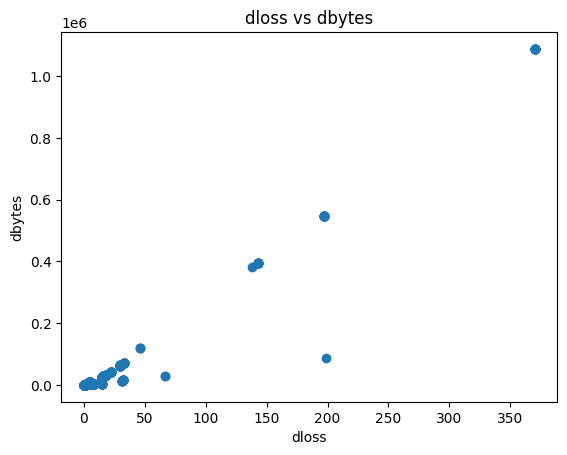

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

df_sample = df.limit(1000)
df_pd = df_sample.toPandas()
plt.scatter(df_pd["dloss"], df_pd["dbytes"])
plt.xlabel("dloss")
plt.ylabel("dbytes")
plt.title("dloss vs dbytes")
plt.show()

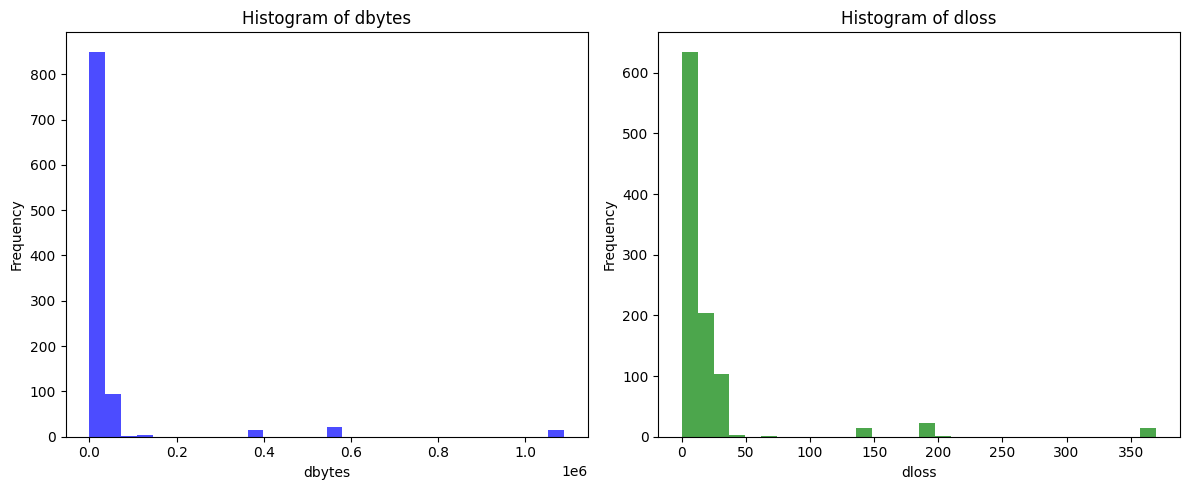

In [17]:
import matplotlib.pyplot as plt

# Limit the data to a manageable size and select only the relevant columns
df_sample = df.select("dbytes", "dloss").limit(1000)  # You can adjust the limit
df_pd = df_sample.toPandas()

# Plot histograms for Dpkts and Spkts
plt.figure(figsize=(12, 5))

# Histogram for Dpkts
plt.subplot(1, 2, 1)
plt.hist(df_pd['dbytes'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of dbytes')
plt.xlabel('dbytes')
plt.ylabel('Frequency')

# Histogram for Spkts
plt.subplot(1, 2, 2)
plt.hist(df_pd['dloss'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of dloss')
plt.xlabel('dloss')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

In [18]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

feature_columns = ["dmeansz", "dloss", "dbytes", "Dload", "dwin", "Dpkts"]

In [19]:
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df)
df_assembled.show(15)

+-----+-----+-----+------+-----+-----+--------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+---------+---------+-----+-----+---------+---------+-------+-------+-------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+--------------------+
|srcip|sport|dstip|dsport|proto|state|     dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|     Sjit|     Djit|Stime|Ltime|  Sintpkt|  Dintpkt| tcprtt| synack| ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|            features|
+-----+-----+-----+------+-----+-----+--------+-----

In [20]:
train_data, test_data = df_assembled.randomSplit([0.8,0.2])

# logistic regression
lr = LogisticRegression(featuresCol="features", labelCol="Label")
lr_model = lr.fit(train_data)

In [21]:
predictions = lr_model.transform(test_data)
predictions.select("features", "label", "prediction").show(15)

+---------+-----+----------+
| features|label|prediction|
+---------+-----+----------+
|(6,[],[])|    1|       0.0|
|(6,[],[])|    1|       0.0|
|(6,[],[])|    1|       0.0|
|(6,[],[])|    1|       0.0|
|(6,[],[])|    1|       0.0|
|(6,[],[])|    1|       0.0|
|(6,[],[])|    1|       0.0|
|(6,[],[])|    1|       0.0|
|(6,[],[])|    1|       0.0|
|(6,[],[])|    1|       0.0|
|(6,[],[])|    1|       0.0|
|(6,[],[])|    1|       0.0|
|(6,[],[])|    1|       0.0|
|(6,[],[])|    1|       0.0|
|(6,[],[])|    1|       0.0|
+---------+-----+----------+
only showing top 15 rows



In [22]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="Label")
accuracy = evaluator.evaluate(predictions)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.9226403751797566


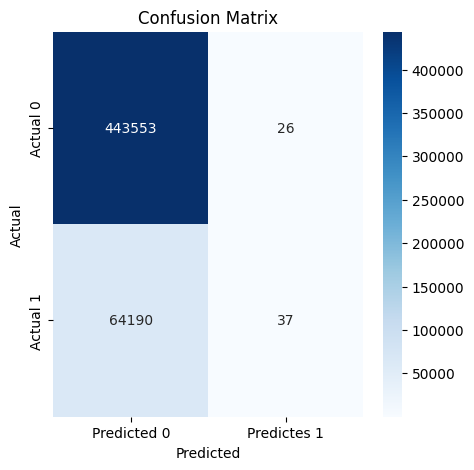

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions_pd = predictions.select("prediction", "Label").toPandas()
cm = confusion_matrix(predictions_pd['Label'], predictions_pd['prediction'])

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predictes 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

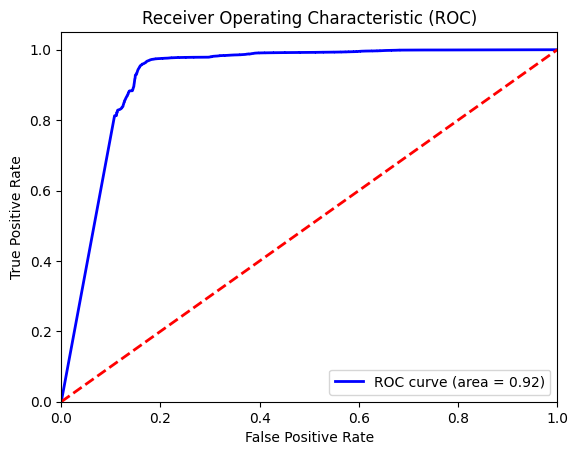

In [24]:
import matplotlib.pyplot as plt
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.linalg import DenseVector
import numpy as np

predictions_pd = predictions.select("probability", "Label").toPandas()
probs = np.array([prob[1] for prob in predictions_pd['probability']])
labels = predictions_pd['Label']

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(labels, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [25]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
train_data = assembler.transform(df)

rf_classifier = RandomForestClassifier(labelCol="Label", featuresCol="features", numTrees=50, maxDepth=10)
rf_model = rf_classifier.fit(train_data)

predictions = rf_model.transform(test_data)

predictions.select("features", "Label", "prediction").show(15)

+---------+-----+----------+
| features|Label|prediction|
+---------+-----+----------+
|(6,[],[])|    1|       1.0|
|(6,[],[])|    1|       1.0|
|(6,[],[])|    1|       1.0|
|(6,[],[])|    1|       1.0|
|(6,[],[])|    1|       1.0|
|(6,[],[])|    1|       1.0|
|(6,[],[])|    1|       1.0|
|(6,[],[])|    1|       1.0|
|(6,[],[])|    1|       1.0|
|(6,[],[])|    1|       1.0|
|(6,[],[])|    1|       1.0|
|(6,[],[])|    1|       1.0|
|(6,[],[])|    1|       1.0|
|(6,[],[])|    1|       1.0|
|(6,[],[])|    1|       1.0|
+---------+-----+----------+
only showing top 15 rows



In [26]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8957633426938634


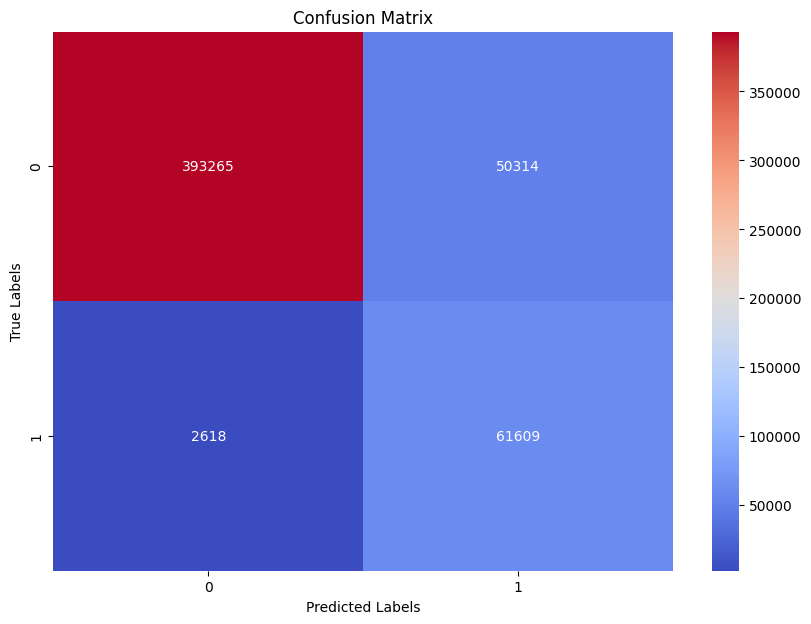

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = predictions.select("Label").collect()
y_pred = predictions.select("prediction").collect()
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()